In [1]:
import os
from PIL import Image
import numpy as np

# Function to load images
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            img = img.resize((64, 64))
            img_array = np.array(img)
            img_array = img_array / 255.0
            img_array_flat = img_array.flatten()
            images.append(img_array_flat)
    return np.array(images)


# loading Images
X_bleeding = load_images("C:/Users/Sharath Balaji T/Desktop/DatsetForUse/Images_Bleeding")
X_non_bleeding = load_images("C:/Users/Sharath Balaji T/Desktop/DatsetForUse/Images_NonBleeding")
#Labelling Images
y_bleeding = np.ones(len(X_bleeding))
y_non_bleeding = np.zeros(len(X_non_bleeding))
#Concatenating features of both bleeding and non-bleeding as X
X = np.concatenate((X_bleeding, X_non_bleeding), axis=0)
#Concatenating labels of both bleeding and non-bleeding as y
y = np.concatenate((y_bleeding, y_non_bleeding), axis=0)

print(X_bleeding.shape)
print(X_non_bleeding.shape)
print(X.shape)
print(y.shape)

(1309, 12288)
(1309, 12288)
(2618, 12288)
(2618,)


In [2]:
#Splitting Data into test(30%) and train(70%) data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model: RandomForestClassifier
Accuracy: 0.97583
Precision: 0.96517
Recall: 0.98728
F1 Score: 0.97610
Confusion Matrix:
[[379  14]
 [  5 388]]


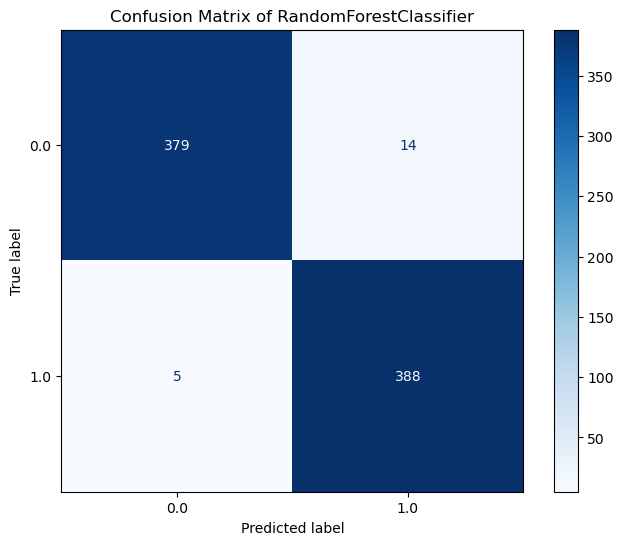

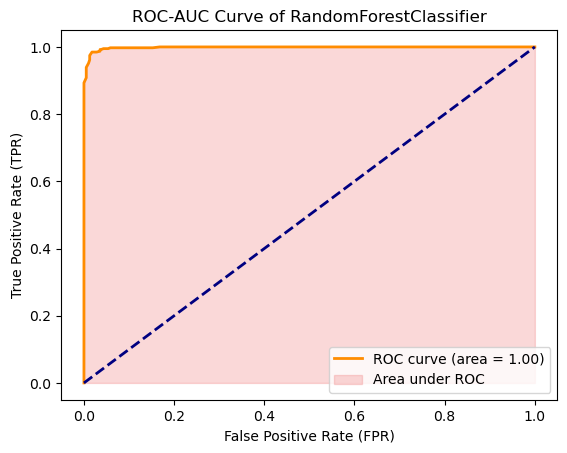

Model: AdaBoostClassifier
Accuracy: 0.97710
Precision: 0.96992
Recall: 0.98473
F1 Score: 0.97727
Confusion Matrix:
[[381  12]
 [  6 387]]


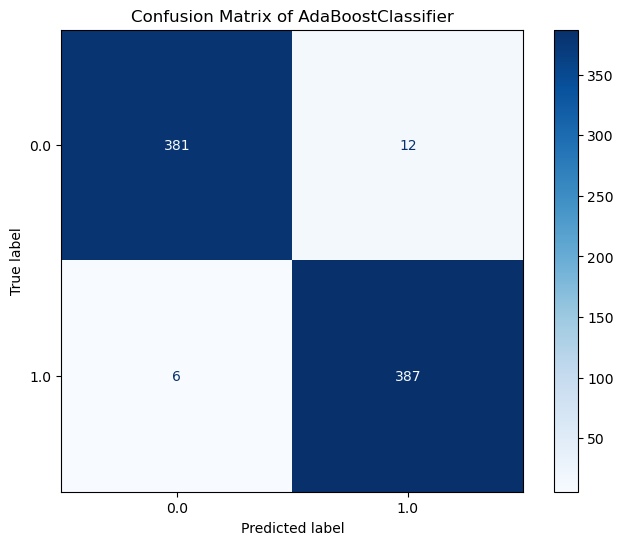

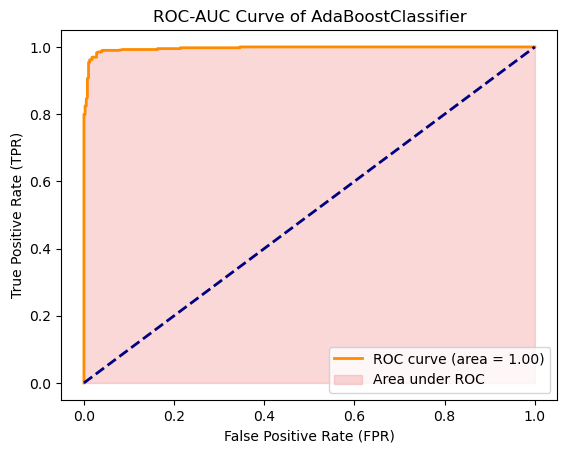

Model: BaggingClassifier
Accuracy: 0.97710
Precision: 0.96526
Recall: 0.98982
F1 Score: 0.97739
Confusion Matrix:
[[379  14]
 [  4 389]]


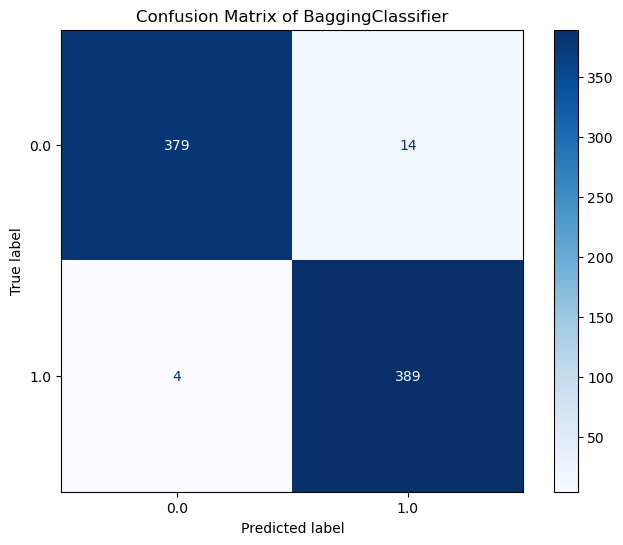

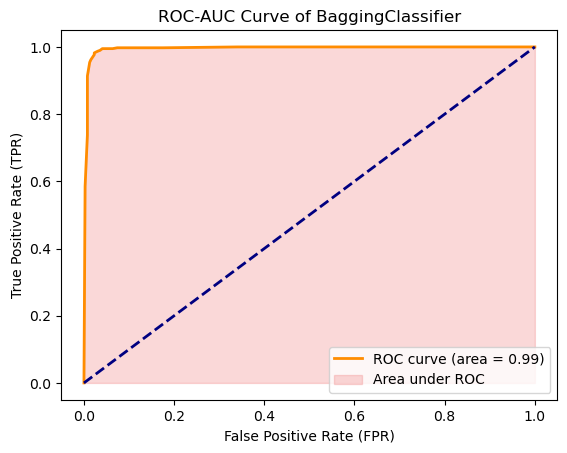

In [11]:
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Initializing base models
random_forest_model = RandomForestClassifier(n_estimators=50,random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=25,random_state=42)
bagging_model = BaggingClassifier(n_estimators=25,random_state=42)

# Training and evaluating each model
for model in [random_forest_model,adaboost_model,bagging_model]:
    # Training each model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    #evaluation matrices of each model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    #Confusion Matrix of each model
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.5f}")
    print(f"F1 Score: {f1:.5f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='.0f', ax=ax)
    ax.set_title(f'Confusion Matrix of {model.__class__.__name__}')
    
    #ROC-AUC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Plotting ROC-AUC Curve
    plt.figure()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(model)))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.fill_between(fpr, tpr, color='lightcoral', alpha=0.3, label='Area under ROC')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC-AUC Curve of {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()


Voting Classifier:
Accuracy: 0.98601
Precision: 0.97750
Recall: 0.99491
F1 Score: 0.98613
Confusion Matrix:
[[384   9]
 [  2 391]]


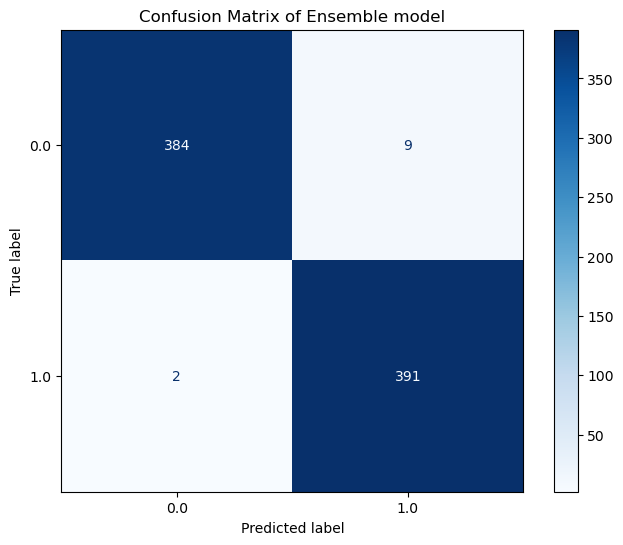

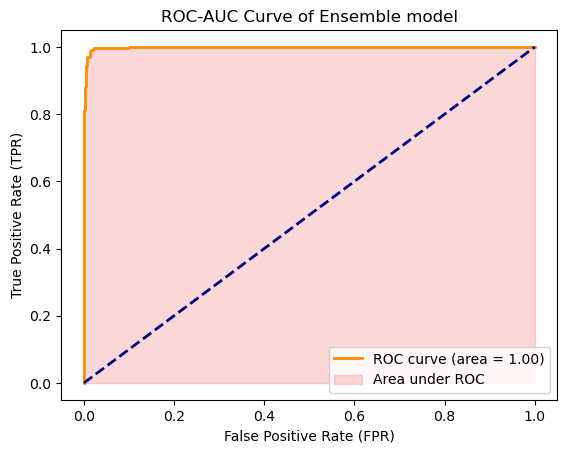

In [12]:
#Initializing ensemble model through voting classifier
voting_classifier = VotingClassifier(estimators=[('random_forest', random_forest_model),('adaboost', adaboost_model),
                                                 ('bagging', bagging_model)], voting='soft')
#Training the ensemble model     
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)
y_proba = voting_classifier.predict_proba(X_test)[:, 1]
#evaluation matrices of model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

#Confusion Matrix of ensemble model
conf_matrix = confusion_matrix(y_test, y_pred_voting)

print("Voting Classifier:")
print(f"Accuracy: {accuracy_voting:.5f}")
print(f"Precision: {precision_voting:.5f}")
print(f"Recall: {recall_voting:.5f}")
print(f"F1 Score: {f1_voting:.5f}")
print(f"Confusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=voting_classifier.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='.0f', ax=ax)
ax.set_title('Confusion Matrix of Ensemble model')
    
#ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Plotting ROC-AUC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.fill_between(fpr, tpr, color='lightcoral', alpha=0.3, label='Area under ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve of Ensemble model')
plt.legend(loc="lower right")
plt.show()

